### __Defining an SMA Crossover Strategy__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# EUR/USD 가격 데이터를 불러온 뒤 data 데이터프레임에 저장
data = pd.read_csv('Course_Materials/eurusd.csv', parse_dates=['Date'], index_col='Date')
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [3]:
# 단기 SMA와 장기 SMA를 정의
# 대중적으로 단기 50/ 장기 200이 사용됨
sma_s = 50
sma_l = 200

#### 단순이동평균을 구하는 데는 2단계가 필요
1. 롤링 혹은 이동창을 정의하고 생성해야 함
    - .rolling() 메소드를 사용함
    - 매개변수에 window가 있음
    - 매개변수에 입력되는 숫자가 윈도우 사이즈

In [4]:
# window 매개변수에 50을 대입하여 롤링 객체를 얻음
data.price.rolling(50)

Rolling [window=50,center=False,axis=0,method=single]

2. 평균 또는 합계와 같은 집계 메소드를 연결해야 함
- 이 예제의 경우는 이동평균을 구하기 때문에 지난 50일 동안 거래일의 평균을 취함 

In [5]:
data.price.rolling(50).mean()

Date
2004-01-01         NaN
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
                ...   
2020-06-24    1.101794
2020-06-25    1.102486
2020-06-26    1.103213
2020-06-29    1.103931
2020-06-30    1.104695
Name: price, Length: 4275, dtype: float64

- 49일 간의 결측치는 가장 최근 50일간의 가격이 없기 때문에 나타남
- 50번째 타임스탬프부터 롤링 평균을 얻게 됨
- 이 데이터를 기반으로 단기(50일)/장기(200일)의 SMA를 생성


In [6]:
data['SMA_S'] = data.price.rolling(sma_s).mean()
data['SMA_L'] = data.price.rolling(sma_l).mean()
data

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


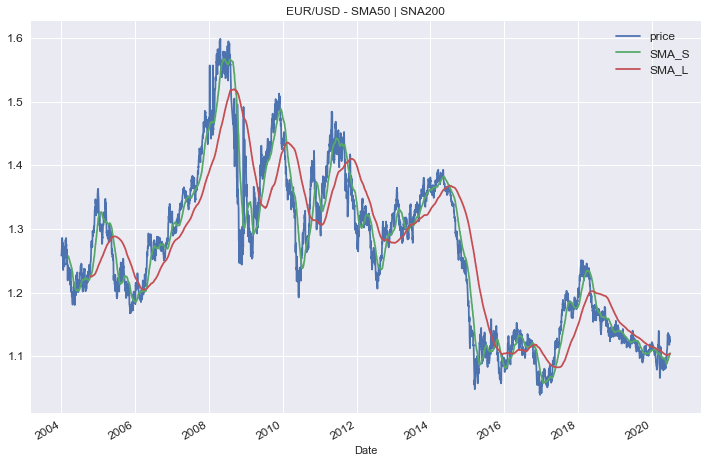

In [7]:
# 데이터프레임 시각화
data.plot(figsize=(12,8), title='EUR/USD - SMA{} | SNA{}'.format(sma_s, sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [8]:
# 초기 데이터는 삭제(결측치)
data.dropna(inplace= True)
data

,price,SMA_S,SMA_L
Date,,,
2004-10-06,1.228094,1.221318,1.226222
2004-10-07,1.229906,1.221840,1.226081
2004-10-08,1.241003,1.222628,1.225995
2004-10-11,1.238405,1.223352,1.225843
2004-10-12,1.232104,1.223888,1.225643
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


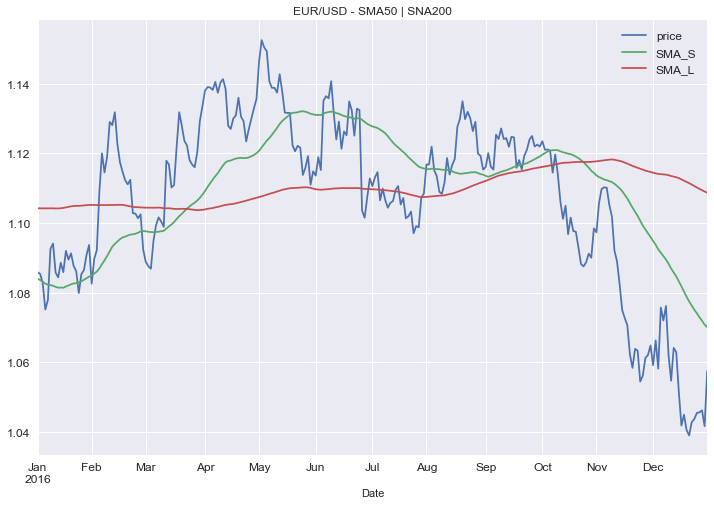

In [9]:
# 데이터프레임 시각화
data.loc['2016'].plot(figsize=(12,8), title='EUR/USD - SMA{} | SNA{}'.format(sma_s, sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()

- 새로운 열 'position' 생성
- 숏 포지션은 -1, 롱 포지션은 +1

In [10]:
# 모든 타임스탬프에 대해서 'SMA_S'가 'SMA_L'보다 크다면 +1 포지션을 가짐
data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


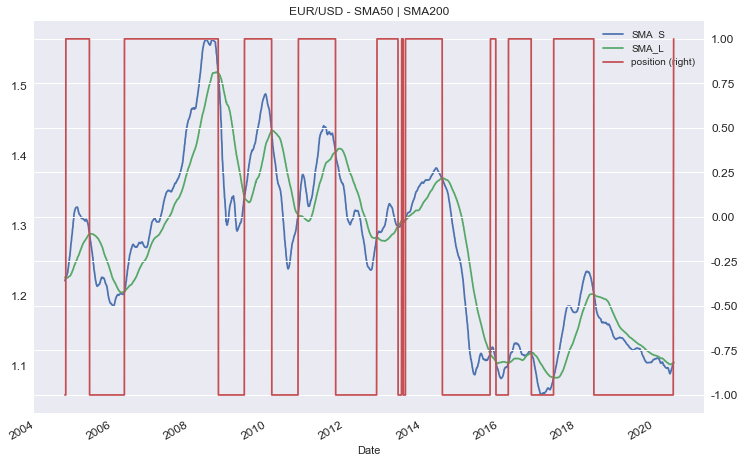

In [11]:
# SMA_S, SMA_A, position 열을 하나의 플롯에 그릴 수 있음
data.loc[:, ['SMA_S', 'SMA_L', 'position']].plot(figsize=(12,8), fontsize=12, secondary_y='position', title='EUR/USD - SMA{} | SMA{}'.format(sma_s, sma_l))
plt.show()

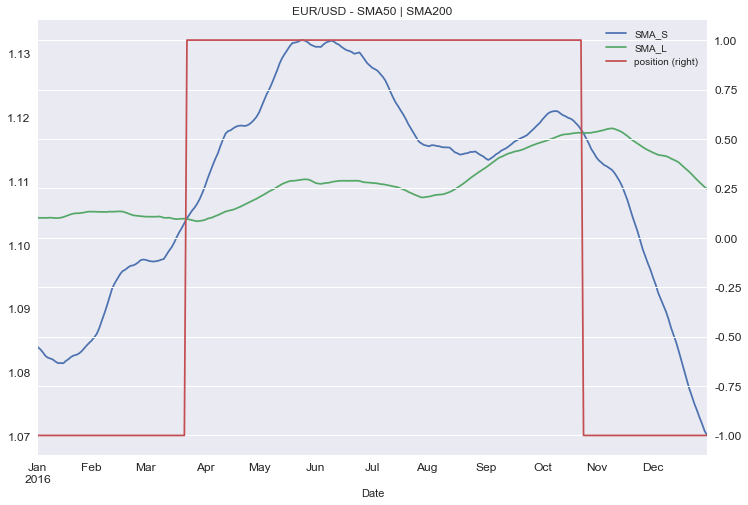

In [12]:
# SMA_S, SMA_A, position 열을 하나의 플롯에 그릴 수 있음
data.loc['2016', ['SMA_S', 'SMA_L', 'position']].plot(figsize=(12,8), fontsize=12, secondary_y='position', title='EUR/USD - SMA{} | SMA{}'.format(sma_s, sma_l))
plt.show()

### __Vectorized Strategy Backtesting__

In [13]:
# 보유 일일 수익률 returns 추가
data['returns'] = np.log(data.price.div(data.price.shift(1)))
# 특정 날짜의 포지션이 롱일때마다, 전략의 수익률은 매수 후 보유와 같음
# 포지션이 숏일때마다, 전략의 수익률은 매수 후 보유 -1

# 전략의 일일 수익률 strategy 추가
# 위치를 한 칸 움직인 다음 매수 후 보유 수익률을 곱해줘야 함
# [ +1 * 수익률 ] or [ -1 * 수익률 ]
data['strategy'] = data.position.shift(1) * data['returns']
data

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102
...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562


In [14]:
# 결측치 제거
data.dropna(inplace=True)

In [15]:
# absolute performance (수익률의 누적 합계)
data[['returns', 'strategy']].sum()

returns    -0.087929
strategy    0.249591
dtype: float64

In [16]:
# absolute performance
data[['returns', 'strategy']].sum().apply(np.exp)

returns     0.915826
strategy    1.283500
dtype: float64

In [17]:
# anualized return
data[['returns', 'strategy']].mean() * 252

returns    -0.005438
strategy    0.015435
dtype: float64

In [18]:
# anualized risk
data[['returns', 'strategy']].std() * np.sqrt(252)

returns     0.120806
strategy    0.120802
dtype: float64

In [19]:
# 매수 후 보유의 누적 수익률 creturns 추가
data['creturns'] = data['returns'].cumsum().apply(np.exp)


In [20]:
# 전략의 누적 수익률 cstrategy 추가
data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)

In [21]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,1.001476,0.998526
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.010511,0.989598
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.008396,0.991673
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.003265,0.996746
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.005545,0.994486
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.921130,1.271272
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.916125,1.278218
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.913781,1.281497


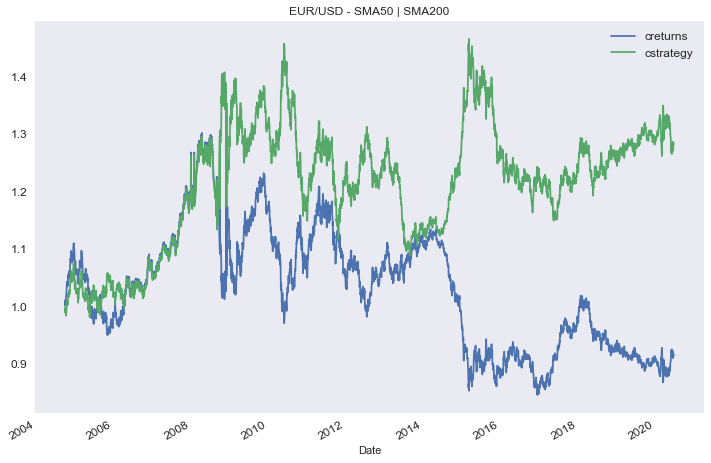

In [22]:
data[['creturns', 'cstrategy']].plot(figsize=(12,8), fontsize=12, secondary_y='position', title='EUR/USD - SMA{} | SMA{}'.format(sma_s, sma_l))
plt.legend(fontsize=12)
plt.show()

In [23]:
# 포지션과 전략에 변화가 생기면서 거래 비용이 성능의 일부를 차지할 것이므로 거래비용을 추가하고 영향을 분석해야 함
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

0.3676743925451291

비용이 발생하기 전 벤치마크를 능가하지 않는 전략은 따르지 않는다는 규칙이 존재
- 비용은 확실히 점점 악화될 것임
- 기억해야 할 것은 벤치마크가 매수 후 보유라는 것과 어떤 비용도 거의 포함되지 않았다는 것
  - 매수 후 보유에서 포지션이 바뀌지 않았기 때문

예시에서 전략이 매수후 보유를 분명히 능가하지만, 이것은 사실 그리 안정적이지 않음
- 단지 2015년과 16년의 영향일 뿐
- 초과 성능은 실제로 안정적이라고 판단할 수 없기 때문에 최상의 전략이 아닐수도 있음

### __Finding the optimal SMA Strategy__

목표 = 최적의 전략과 최적의 범위를 찾자.

가정
단기 SMA의 범위가 10 ~ 50
장기 SMA의 범위가 150 ~ 250 

In [24]:
# 원시 데이터를 다시 불러옴
df = pd.read_csv('Course_Materials/eurusd.csv', parse_dates=['Date'], index_col='Date')
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [25]:
#이전에 전개한 코드를 'run_strategy' 함수로 집계 및 요약
def run_strategy(SMA): # 하나의 인자 SMA를 가짐 (튜플)
    data = df.copy()
    data['returns'] = np.log(data.price.div(data.price.shift(1))) # 로그 수익률을 계산
    data['SMA_S'] = data.price.rolling(int(SMA[0])).mean() # 튜플SMA의 인덱스를 사용하여 추가열 생성, SMA[0]은 단기
    data['SMA_L'] = data.price.rolling(int(SMA[1])).mean() # 튜플SMA의 인덱스를 사용하여 추가열 생성, SMA[1]은 장기
    data.dropna(inplace=True)

    # position열을 생성 : 단기SMA가 장기SMA보다 클 경우 롱포지션, 그렇지 않을 경우 숏 포지션
    data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)     
    # 전략의 일일 수익률을 사용하여 strategy 열을 생성
    data['strategy'] = data.position.shift(1) * data['returns']
    data.dropna(inplace=True)

    # 매수 후 보유와 전략에 대한 절대 성능을 반환
    # 로그 수익률의 합계를 구한 뒤 투자한 1달러의 최종 값을 계산함
    return data[['returns', 'strategy']].sum().apply(np.exp)#[-1] #<-- 절대 성능만 출력 가능

In [26]:
# 요구되는 하나의 인자 = 단기 SMA와 장기 SMA 튜플
# 예시 run_strategy 함수를 실행할 때 튜플(50, 200)을 사용할 수 있음
# 결과값은 매수 후 보유의 절대 성능과 전략의 절대 성능
# 이 함수를 사용하여 꽤 융통성 있게 전략을 수정할 수 있음
run_strategy((50, 200))

returns     0.915826
strategy    1.283500
dtype: float64

In [27]:
# 단기 SMA 10, 장기 SMA 50을 설정하면 매수 후 보유에서 손실
run_strategy((10, 50))

returns     0.919492
strategy    0.987000
dtype: float64

In [28]:
# 단기SMA22, 장기SMA 252
# 252일의 거래일 = 실제 1년
# 절대 성능 1.14로 (50, 100)전략보다 낮음
run_strategy((22, 252))

returns     0.83984
strategy    1.14928
dtype: float64

In [29]:

def run_strategy(SMA): 
    data = df.copy()
    data['returns'] = np.log(data.price.div(data.price.shift(1))) 
    data['SMA_S'] = data.price.rolling(int(SMA[0])).mean() 
    data['SMA_L'] = data.price.rolling(int(SMA[1])).mean() 
    data.dropna(inplace=True)

    data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)     
    data['strategy'] = data.position.shift(1) * data['returns']
    data.dropna(inplace=True)

    # 음의 절대 성능을 반환하게 하여 함수를 최소화함
    # 음의 절대 성능을 최소화함으로써 절대 성능을 최대화 할 수 있음
    return -data[['returns', 'strategy']].sum().apply(np.exp)#[-1] 

In [30]:
# 최적화 알고리즘 선택
# scipy.optimize에서 무자별 대입 최적화 알고리즘을 선택
# 함수의 최소값만 찾을 수 있음
from scipy.optimize import brute

In [32]:
# 무차별 대입으로 주어진 범위에 함수를 최소화
# 가능한 모든 조합을 실행하고 결과를 계산한 다음 최소값을 찾음
# 예시: SMA10과 SMA100을 조합해본 뒤, SMA11과 SMA100의 조합을 시도
# brute(run_strategy, ((10,50, 1), (100, 252, 1)))

In [37]:
# 최적화 알고리즘으로 찾은 값을 입력
# 현재 run_strategy 함수는 음수값을 출력하게 세팅되어 있으므로 함수에 '-'(마이너스)기호를 붙여서 변환함
-run_strategy((46, 137))

returns     0.905647
strategy    2.526694
dtype: float64

### __Finding the optimal SMA Strategy__

백테스팅의 몇가지 제한 사항을 염두에 두어야 함
1. 전략이 과거의 데이터를 기반하지 않거나, 과거 데이터에 최적화되어 있지 않다면 백테스팅이 적절

2. 이 예제의 경우, 이미 전략을 과거 데이터에 최적화되는 쪽으로 과거 데이터에 피팅시켰음
- 이 알고리즘은 데이터에 피팅되어 있기 때문에, SMA 46, 137이 미래에도 최선의 전략이라고 보장할 수 없음
- 따라서 전략이 과거 데이터에 최적화 되어 있거나 피팅되어 있다면, 이 전략의 품질을 테스트 해보아야 함
- 미래의 데이터를 가지고 추가 테스트를 진행해야 함

